<a href="https://colab.research.google.com/github/dj7m/projects/blob/main/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
#checking versions of tensorflow and keras
print(f"tensorflow version:{tf.__version__}")
print(f"keras version:{tf.keras.__version__}")

tensorflow version:2.5.0
keras version:2.5.0


In [3]:
os.getcwd()

'/content'

In [4]:
device_list = ['CPU', 'GPU']

for device in device_list:
  myDevice = tf.config.list_physical_devices(device)
  if len(myDevice) > 0:
    print(f"{device} is available!")
    print(f"Details: {myDevice}")

  else:
    print(f"{device} is unavailable!")
    print(f"Details: {myDevice}")


CPU is available!
Details: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU is available!
Details: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
f_MNIST = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = f_MNIST.load_data()

In [6]:
print(f"Data type{X_train_full.dtype} \n shape of the data {X_train_full.shape}")

Data typeuint8 
 shape of the data (60000, 28, 28)


In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
#Creating a validation set from X_train_full and scaling the data by 255
X_valid,X_train=X_train_full[:5000]/255.  , X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

#Scaling the test set as well
X_test=X_test/255.


In [9]:
print(f"Valid set size {X_valid.shape}")
print(f"Train set size {X_train.shape}")
print(f"Test set size {X_test.shape}")

Valid set size (5000, 28, 28)
Train set size (55000, 28, 28)
Test set size (10000, 28, 28)


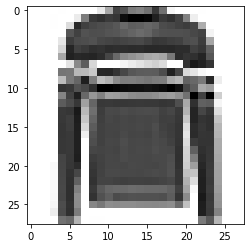

In [10]:
#Lets see some data
#Plt.imshow(X_train_full[5],cmap="binary")
plt.imshow(X_valid[5],cmap="binary")
plt.show()

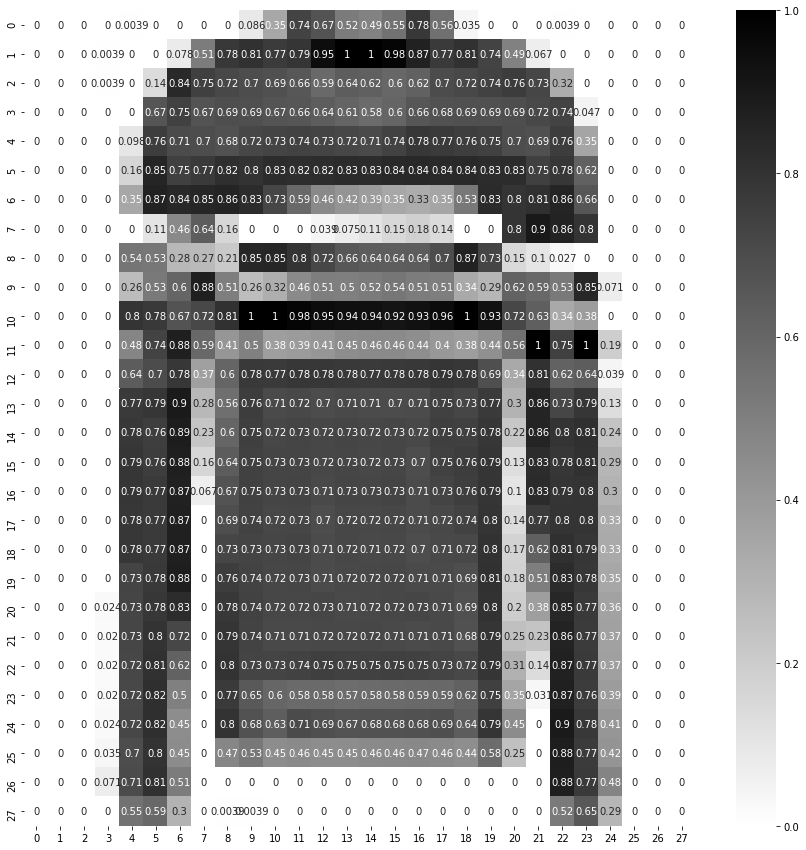

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(X_valid[5], annot=True, cmap="binary")

In [12]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape = [28,28], name="InputLayer" ),
          tf.keras.layers.Dense(400, activation="relu", name="HiddenLayer1"),
          tf.keras.layers.Dense(200, activation="relu", name = "Hiddenlayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name ="OutputLater")
]

In [13]:
model = tf.keras.models.Sequential(LAYERS)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
HiddenLayer1 (Dense)         (None, 400)               314000    
_________________________________________________________________
Hiddenlayer2 (Dense)         (None, 200)               80200     
_________________________________________________________________
OutputLater (Dense)          (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


In [15]:
hidden1 = model.layers[1]
hidden1.name

'HiddenLayer1'

In [16]:
hidenLayer=model.layers[1]
hidenLayer.name

'HiddenLayer1'

In [17]:
weights , bias = hidenLayer.get_weights()

In [18]:
weights.shape

(784, 400)

In [19]:
# Compiling model
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD" 
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [20]:
# Defining callbacks
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]


# training
EPOCHS = 100
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=CALLBACKS )

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7252 - accuracy: 0.7625 - val_loss: 0.5129 - val_accuracy: 0.8272
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4927 - accuracy: 0.8283 - val_loss: 0.4609 - val_accuracy: 0.8466
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4459 - accuracy: 0.8452 - val_loss: 0.4233 - val_accuracy: 0.8542
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4180 - accuracy: 0.8530 - val_loss: 0.4171 - val_accuracy: 0.8560
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3987 - accuracy: 0.8592 - val_loss: 0.4073 - val_accuracy: 0.8586
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3808 - accuracy: 0.8664 - val_loss: 0.3873 - val_accuracy: 0.8628
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3668 - accuracy: 0.8708 - val_loss: 0.3643 - val_ac

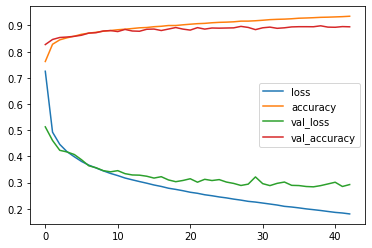

In [21]:
pd.DataFrame(history.history).plot()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3178 - accuracy: 0.8873


[0.31780266761779785, 0.8873000144958496]

In [23]:
x_new = X_test[:3]

In [24]:
actual = y_test[:3]
actual

array([9, 2, 1], dtype=uint8)

In [25]:
y_prob = model.predict(x_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.002, 0.   ,
        0.997],
       [0.   , 0.   , 0.994, 0.   , 0.006, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [26]:
y_pred = np.argmax(y_prob, axis = -1)
y_pred

array([9, 2, 1])

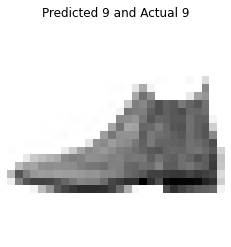

######################


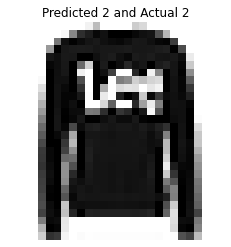

######################


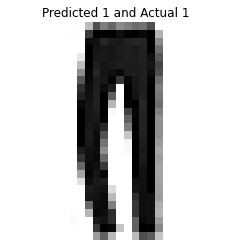

######################


In [27]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")

In [28]:
%load_ext tensorboard

In [29]:
%tensorboard --logdir="logs"

Reusing TensorBoard on port 6006 (pid 197), started 0:23:52 ago. (Use '!kill 197' to kill it.)

<IPython.core.display.Javascript object>